# Convolutional Neural Network

### Importing the libraries

In [76]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [77]:
dataset_train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = dataset_train.flow_from_directory('D:/Emotion Detector/data/Train',
                                                 color_mode="grayscale",
                                                 target_size = (50,50),
                                                 batch_size = 32 ,
                                                 class_mode = 'categorical')

Found 7442 images belonging to 6 classes.


### Preprocessing the Test set

In [78]:
dataset_test = ImageDataGenerator(rescale = 1./255)
test_set = dataset_test.flow_from_directory('D:/Emotion Detector/data/Test',
                                                color_mode="grayscale",
                                                 target_size = (50,50),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4529 images belonging to 6 classes.


## Part 2 - Building the CNN

In [79]:
print(training_set[0][0][0])

[[[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.00162191]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.00162191]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.00162191]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]


### Initialising the CNN

In [80]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [81]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[50,50,1]))

### Step 2 - Pooling

In [82]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Adding a second convolutional layer

In [83]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

### Step 3 - Flattening

In [84]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [85]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

### Step 5 - Output Layer

In [86]:
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [87]:
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [88]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1982976   
_________________________________________________________________
dense_11 (Dense)             (None, 6)                

### Training the CNN on the Training set and evaluating it on the Test set

In [89]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs=70)

Epoch 1/70
233/233 [==============================] - 14s 61ms/step - loss: 1.6768 - accuracy: 0.2648 - val_loss: 1.5557 - val_accuracy: 0.3595
Epoch 2/70
233/233 [==============================] - 14s 61ms/step - loss: 1.5588 - accuracy: 0.3452 - val_loss: 1.5162 - val_accuracy: 0.3935
Epoch 3/70
233/233 [==============================] - 14s 61ms/step - loss: 1.5072 - accuracy: 0.3733 - val_loss: 1.5464 - val_accuracy: 0.3937
Epoch 4/70
233/233 [==============================] - 14s 61ms/step - loss: 1.4487 - accuracy: 0.4028 - val_loss: 1.4234 - val_accuracy: 0.4052
Epoch 5/70
233/233 [==============================] - 14s 61ms/step - loss: 1.4256 - accuracy: 0.4211 - val_loss: 1.4209 - val_accuracy: 0.4200
Epoch 6/70
233/233 [==============================] - 14s 62ms/step - loss: 1.3893 - accuracy: 0.4351 - val_loss: 1.4065 - val_accuracy: 0.4509
Epoch 7/70
233/233 [==============================] - 14s 61ms/step - loss: 1.3690 - accuracy: 0.4429 - val_loss: 1.3446 - val_accuracy:

# PLOTS

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


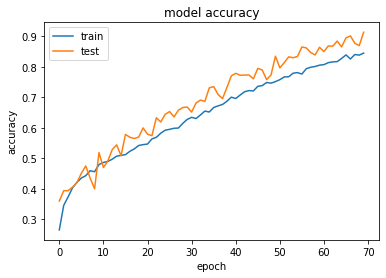

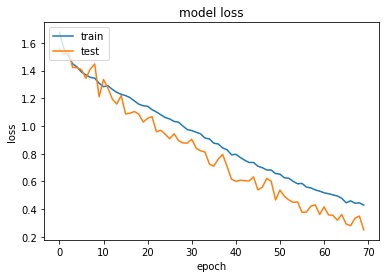

In [93]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('D:/Emotion Detector/Accuracy_Graph.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('D:/Emotion Detector/Loss_Graph.png')
plt.show()